### CSCI 6330
### Group Members: Thomas, Ahmeed, Eben, Tingting

### Data proprecssing without MPI

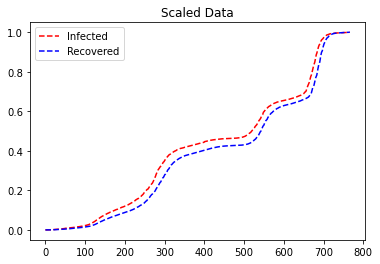

CPU time for data preprocessing in seconds: 0.14188800699999948


In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data

#specify the scaling type
scaler =MinMaxScaler()
#get the start time
start =process_time()

#load the data
data =pd.read_csv("tndata.csv")

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn])
        RR =np.array(R[:nn])
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.show()    
    return 

data_process(data, scaler, "yes")

stop = process_time()
print("CPU time for data preprocessing in seconds:",stop-start) 